In [7]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt



In [8]:
def load_images_from_folder(main_folder):
    images = []
    for class_folder in os.listdir(main_folder):
        class_folder_path = os.path.join(main_folder, class_folder)
        if os.path.isdir(class_folder_path):
            for filename in os.listdir(class_folder_path):
                if filename.endswith(('.png', '.jpg', '.jpeg')):
                    img = Image.open(os.path.join(class_folder_path, filename))
                    if img is not None:
                        images.append((class_folder, img))  # Append tuple (class_label, image)
    return images

# Example usage:
main_folder_path = "/Users/asminahar/Documents/HAND SYMBOLS-2/"
images = load_images_from_folder(main_folder_path)

# Print the number of images loaded
print("Number of images loaded:", len(images))



Number of images loaded: 100


In [9]:
import os
import random
from PIL import Image, ImageEnhance, ImageOps, ImageFilter 

def augment_image(image, class_label, output_dir, filename):
    # Rotate the image (random angle between -15 and 15 degrees)
    rotated_image = image.rotate(random.randint(-15, 15))
    rotated_image.save(os.path.join(output_dir, class_label, "rotated_" + filename))

    # Flip the image horizontally
    flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    flipped_image.save(os.path.join(output_dir, class_label, "flipped_" + filename))

    # Adjust brightness and contrast
    enhancer = ImageEnhance.Brightness(image)
    brightened_image = enhancer.enhance(1.5)  # Increase brightness
    brightened_image.save(os.path.join(output_dir, class_label, "brightened_" + filename))

    enhancer = ImageEnhance.Contrast(image)
    contrasted_image = enhancer.enhance(1.5)  # Increase contrast
    contrasted_image.save(os.path.join(output_dir, class_label, "contrasted_" + filename))

    # Convert to grayscale
    grayscale_image = image.convert("L")
    grayscale_image.save(os.path.join(output_dir, class_label, "grayscale_" + filename))

    # Edge detection (using PIL's built-in filter)
    edge_image = image.filter(ImageFilter.FIND_EDGES)
    edge_image.save(os.path.join(output_dir, class_label, "edges_" + filename))

# Define your main folder containing the original images
main_folder_path = "/Users/asminahar/Documents/HAND SYMBOLS-2/"
augmented_folder_path ="/Users/asminahar/Documents/Augmented Images - Resized/"

# Create the output directory if it doesn't exist
os.makedirs(augmented_folder_path, exist_ok=True)

# Resize images to a constant size
def resize_images(images, target_size):
    resized_images = []
    for class_label, img_path in images:
        with Image.open(img_path) as img:
            resized_img = img.resize(target_size)
            resized_images.append((class_label, resized_img, os.path.basename(img_path)))  # Preserve class label and filename
    return resized_images

# Example usage:
target_size = (224, 224)  # Example target size for VGG, ResNet, etc.

# Get the list of image paths in the main folder
images = []
for class_folder in os.listdir(main_folder_path):
    class_folder_path = os.path.join(main_folder_path, class_folder)
    for filename in os.listdir(class_folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(class_folder_path, filename)
            images.append((class_folder, image_path))

# Resize the loaded images
resized_images = resize_images(images, target_size)

# Perform augmentation for each resized image
for class_label, img, filename in resized_images:
    class_folder_path = os.path.join(augmented_folder_path, class_label)
    os.makedirs(class_folder_path, exist_ok=True)
    augment_image(img, class_label, augmented_folder_path, filename)


/var/folders/lp/wrx395zj1qzfkqm9n6rcysxr0000gn/T/ipykernel_54228/3968067911.py:11: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)


In [9]:
import os

def count_images(folder_path):
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                total_images += 1
    return total_images

# Define your augmented folder path
augmented_folder_path ="/Users/asminahar/Documents/Augmented Images - Resized/"

# Count the total number of images in the augmented folder
total_augmented_images = count_images(augmented_folder_path)
print("Total number of images in the augmented folder:", total_augmented_images)


Total number of images in the augmented folder: 600


In [20]:
import os
import random
import shutil

def count_images(folder_path):
    class_counts = {}
    for class_label in os.listdir(folder_path):
        class_folder_path = os.path.join(folder_path, class_label)
        if os.path.isdir(class_folder_path):  # Check if it's a directory
            class_counts[class_label] = sum(1 for _ in os.listdir(class_folder_path))
    return class_counts


def split_dataset(input_folder, output_train_folder, output_val_folder, split_ratio):
    class_counts = count_images(input_folder)
    
    for class_label, count in class_counts.items():
        class_folder_path = os.path.join(input_folder, class_label)
        images = os.listdir(class_folder_path)
        random.shuffle(images)
        split_index = int(split_ratio * count)

        # Split images into training and validation sets
        train_images = images[:split_index]
        val_images = images[split_index:]

        # Copy images to train and val folders
        for image in train_images:
            src_path = os.path.join(class_folder_path, image)
            dest_path = os.path.join(output_train_folder, class_label, image)

            # Ensure source file exists before copying
            if os.path.exists(src_path):
                # Ensure destination directory exists
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                try:
                    shutil.copy(src_path, dest_path)
                except Exception as e:
                    print(f"Error copying {src_path} to {dest_path}: {e}")

        for image in val_images:
            src_path = os.path.join(class_folder_path, image)
            dest_path = os.path.join(output_val_folder, class_label, image)

            # Ensure source file exists before copying
            if os.path.exists(src_path):
                # Ensure destination directory exists
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                try:
                    shutil.copy(src_path, dest_path)
                except Exception as e:
                    print(f"Error copying {src_path} to {dest_path}: {e}")

# Define paths
augmented_folder_path = "/Users/asminahar/Documents/Augmented Images - Resized/"
train_folder_path = "/Users/asminahar/Documents/Train Images/"
val_folder_path = "/Users/asminahar/Documents/Val Images/"

# Split dataset with 80-20 ratio
split_ratio = 0.8
split_dataset(augmented_folder_path, train_folder_path, val_folder_path, split_ratio)


In [10]:
import os

def count_images_in_folder(folder_path):
    total_count = 0
    for class_label in os.listdir(folder_path):
        class_folder_path = os.path.join(folder_path, class_label)
        if os.path.isdir(class_folder_path):  # Check if it's a directory
            total_count += len(os.listdir(class_folder_path))
    return total_count

# Define paths
train_folder_path = "/Users/asminahar/Documents/Train Images/"
val_folder_path = "/Users/asminahar/Documents/Val Images/"

# Count images in train and val folders
train_image_count = count_images_in_folder(train_folder_path)
val_image_count = count_images_in_folder(val_folder_path)

print("Number of images in train folder:", train_image_count)
print("Number of images in val folder:", val_image_count)


Number of images in train folder: 481
Number of images in val folder: 121


In [11]:
import os

def count_images_in_folder(folder_path):
    class_counts = {}
    for class_label in os.listdir(folder_path):
        class_folder_path = os.path.join(folder_path, class_label)
        if os.path.isdir(class_folder_path):  # Check if it's a directory
            class_counts[class_label] = len(os.listdir(class_folder_path))
    return class_counts

# Define paths
train_folder_path = "/Users/asminahar/Documents/Train Images/"
val_folder_path = "/Users/asminahar/Documents/Val Images/"

# Count images in train and val folders for each class
train_class_counts = count_images_in_folder(train_folder_path)
val_class_counts = count_images_in_folder(val_folder_path)

print("Train class counts:", train_class_counts)
print("Val class counts:", val_class_counts)


Train class counts: {'U': 96, 'I': 96, 'A': 97, 'O': 96, 'E': 96}
Val class counts: {'U': 24, 'I': 24, 'A': 25, 'O': 24, 'E': 24}


In [32]:
from PIL import Image
import os

# Define the path to your dataset
dataset_path = "/Users/asminahar/Documents/Augmented Images - Resized/"

# Iterate through the dataset and check the dimensions of each image
for class_label in os.listdir(dataset_path):
    class_folder_path = os.path.join(dataset_path, class_label)
    if not os.path.isdir(class_folder_path):
        continue  # Skip if not a directory
    for image_file in os.listdir(class_folder_path):
        image_path = os.path.join(class_folder_path, image_file)
        if not os.path.isfile(image_path):
            continue  # Skip if not a file
        img = Image.open(image_path)
        width, height = img.size
        print(f"Image: {image_path}, Dimensions: {width}x{height}")


Image: /Users/asminahar/Documents/Augmented Images - Resized/U/brightened_IMG_0051.jpeg, Dimensions: 224x224
Image: /Users/asminahar/Documents/Augmented Images - Resized/U/edges_IMG_0052.jpeg, Dimensions: 224x224
Image: /Users/asminahar/Documents/Augmented Images - Resized/U/flipped_IMG_0035.jpeg, Dimensions: 224x224
Image: /Users/asminahar/Documents/Augmented Images - Resized/U/brightened_IMG_0047.jpeg, Dimensions: 224x224
Image: /Users/asminahar/Documents/Augmented Images - Resized/U/edges_IMG_0044.jpeg, Dimensions: 224x224
Image: /Users/asminahar/Documents/Augmented Images - Resized/U/contrasted_IMG_0035.jpeg, Dimensions: 224x224
Image: /Users/asminahar/Documents/Augmented Images - Resized/U/grayscale_IMG_0045.jpeg, Dimensions: 224x224
Image: /Users/asminahar/Documents/Augmented Images - Resized/U/edges_IMG_0048.jpeg, Dimensions: 224x224
Image: /Users/asminahar/Documents/Augmented Images - Resized/U/flipped_IMG_0039.jpeg, Dimensions: 224x224
Image: /Users/asminahar/Documents/Augment

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import os


# Define paths
train_folder_path = "/Users/asminahar/Documents/Train Images/"
val_folder_path = "/Users/asminahar/Documents/Val Images/"

# Define a simple CNN model

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 5)  # Assuming 5 classes

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class_label_map = {'A': 0, 'E': 1, 'I': 2, 'O': 3, 'U': 4}
from torchvision.io.image import ImageReadMode

class CustomDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.image_files = []
        self.labels = []
        self.transform = transform
        for class_label in os.listdir(folder_path):
            class_folder_path = os.path.join(folder_path, class_label)
            if class_label in class_label_map:  # Check if it's a valid class label
                for image_file in os.listdir(class_folder_path):
                    self.image_files.append(os.path.join(class_folder_path, image_file))
                    self.labels.append(class_label_map[class_label])  # Convert class label to integer
            else:
                print(f"Ignoring folder '{class_label}' as it is not a valid class label.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        image = torchvision.io.read_image(self.image_files[idx], mode=ImageReadMode.RGB).float()  # Read image in RGB mode
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Assuming images are in range [0, 1]
])

# Create datasets and dataloaders
train_dataset = CustomDataset(train_folder_path)
val_dataset = CustomDataset(val_folder_path)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


Ignoring folder '.DS_Store' as it is not a valid class label.
Ignoring folder '.DS_Store' as it is not a valid class label.


Epoch 1, Train Loss: 0.025143808933595815, Validation Accuracy: 80.83%
Epoch 2, Train Loss: 0.00935399867594242, Validation Accuracy: 81.67%
Epoch 3, Train Loss: 0.006605845301722487, Validation Accuracy: 78.33%
Epoch 4, Train Loss: 0.002871950944730391, Validation Accuracy: 81.67%
Epoch 5, Train Loss: 0.0018915862155457338, Validation Accuracy: 82.50%
Epoch 6, Train Loss: 0.0014750770099150638, Validation Accuracy: 84.17%
Epoch 7, Train Loss: 0.001213277317583561, Validation Accuracy: 84.17%
Epoch 8, Train Loss: 0.001024985460874935, Validation Accuracy: 83.33%
Epoch 9, Train Loss: 0.0008777433695892493, Validation Accuracy: 85.00%
Epoch 10, Train Loss: 0.0007611960909950237, Validation Accuracy: 85.00%


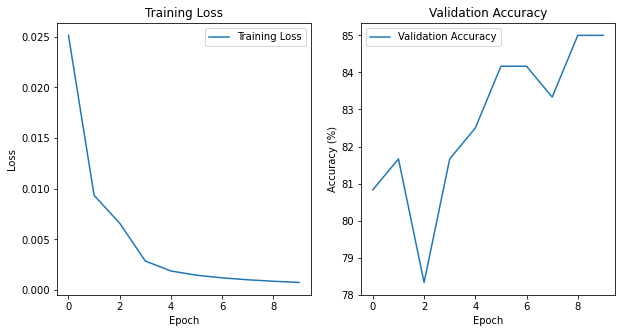

In [40]:
import matplotlib.pyplot as plt


# Initialize the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Initialize lists to store training loss and validation accuracy
train_losses = []
val_accuracies = []

# Train the model
for epoch in range(10):  # Train for 10 epochs
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    # Compute training loss
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    
    # Compute validation accuracy
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = (correct / total) * 100
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Validation Accuracy: {val_accuracy:.2f}%")

# Plot training loss and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.show()
